In [1]:
import sys
sys.path.append('../src/')
from utils import benchmark
from utils import iterate_bru_args
from utils import BenchmarkResult
from utils import ConstructionOption
from utils import MemoSchemeOption
from utils import SchedulerOption
from subprocess import TimeoutExpired

import matplotlib.pyplot as plt

In [2]:
max_x = 30

data = {}
xs = list(range(1, max_x))
for bru_args in iterate_bru_args():
    label = "-".join([e.value for e in bru_args.values()])
    ys = []
    try:
        for x in xs:
            y = BenchmarkResult(benchmark('^(a*)*$', 'a' * x + 'b', bru_args)['stderr']).steps
            ys.append(y)
    except TimeoutExpired:
        pass
    data[label] = ys

In [3]:
print(data)

{'thompson-none-spencer': [3, 7, 15, 31, 63, 127, 255, 511, 1023, 2047, 4095, 8191, 16383, 32767, 65535, 131071, 262143, 524287, 1048575, 2097151, 4194303, 8388607, 16777215], 'thompson-cn-spencer': [7, 11, 15, 19, 23, 27, 31, 35, 39, 43, 47, 51, 55, 59, 63, 67, 71, 75, 79, 83, 87, 91, 95, 99, 103, 107, 111, 115, 119], 'thompson-in-spencer': [13, 20, 27, 34, 41, 48, 55, 62, 69, 76, 83, 90, 97, 104, 111, 118, 125, 132, 139, 146, 153, 160, 167, 174, 181, 188, 195, 202, 209], 'thompson-none-lockstep': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'glushkov-none-spencer': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'glushkov-cn-spencer': [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60], 'glushkov-in-spencer': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 2

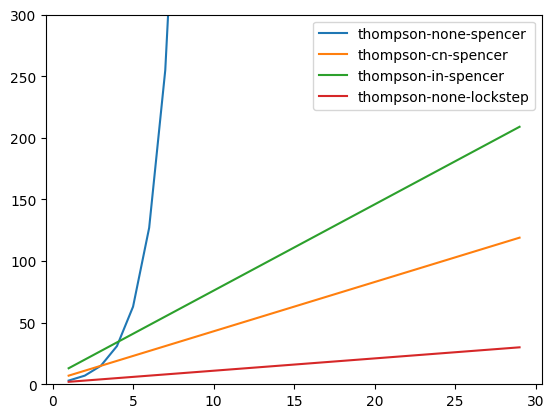

In [11]:
for label, ys in list(data.items())[:4]:
    plt.plot(xs[:len(ys)], ys)
plt.ylim(0, 300)
plt.legend(list(data.keys())[:4])
plt.show()

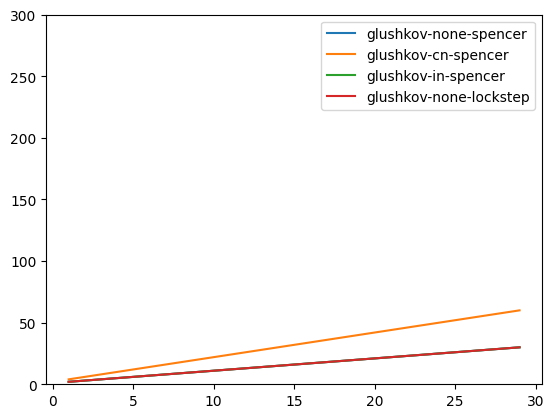

In [12]:
for label, ys in list(data.items())[4:]:
    plt.plot(xs[:len(ys)], ys)
plt.ylim(0, 300)
plt.legend(list(data.keys())[4:])
plt.show()